In [10]:
import pandas as pd
import numpy as np
import uuid
import geopandas as gd
import matplotlib.pyplot as plt

# df = pd.read_csv("data/encounters.csv")
# df.head()
# I've tried it with just the patients.csv or just encounters.csv
# and it still doesn't really work the way I want it to

# df1 = pd.read_csv("data/patients.csv")
# df2 = pd.read_csv("data/encounters.csv")
# df = pd.concat([df1, df2], axis=1, join='outer').sort_index()
# df.head()

df1 = pd.read_csv("data/patients2.csv")
df2 = pd.read_csv("data/encounters2.csv")
df = df1.append(df2)
df.head()
# I tried modifying the actual csv files to somehow work
# and you guessed it, didn't work even with removing some columns

# I've tried different ways of combining the two .csv files
# together since there's not one single file with all of the
# parameters the example has and none of them work (see last entry)
# so I don't actually know how to get the histogram to run

,PATIENT,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,21c92806-9c98-4e52-4129-16096a5fbcf9,1975-09-08,NaN,999-84-5429,S99936175,X86300168X,Mr.,Gino587,Berge125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e3d425e1-8ec2-e743-2c12-8eb32910135e,1973-11-26,NaN,999-87-5412,S99994020,X57245099X,Mrs.,Lise687,Denesik803,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9768b899-f26a-5ce9-7e4f-2863c34faea9,2019-10-14,NaN,999-51-9903,NaN,NaN,NaN,Bryce11,Price929,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a91148cb-4780-9c93-37f1-a7f05518934f,2017-11-22,NaN,999-21-3084,NaN,NaN,NaN,Tereasa291,Lubowitz58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b98c2674-93d0-b86e-84ba-5842b034046f,1986-04-06,1999-01-04,999-18-3681,NaN,NaN,NaN,Esperanza675,Salas880,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df[df["PATIENT"] == "21c92806-9c98-4e52-4129-16096a5fbcf9"]

,PATIENT,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,21c92806-9c98-4e52-4129-16096a5fbcf9,1975-09-08,NaN,999-84-5429,S99936175,X86300168X,Mr.,Gino587,Berge125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,21c92806-9c98-4e52-4129-16096a5fbcf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,c39d37f1-bc5e-3258-89cf-01ef84330475,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185347001.0,Encounter for problem,76.50,76.50,16.50,NaN,NaN
1,21c92806-9c98-4e52-4129-16096a5fbcf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,c39d37f1-bc5e-3258-89cf-01ef84330475,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185347001.0,Encounter for problem,76.50,76.50,16.50,NaN,NaN
2,21c92806-9c98-4e52-4129-16096a5fbcf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,c39d37f1-bc5e-3258-89cf-01ef84330475,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185345009.0,Encounter for symptom,76.50,76.50,16.50,367498001.0,Seasonal allergic rhinitis
3,21c92806-9c98-4e52-4129-16096a5fbcf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4191c701-9b73-33fe-aece-0e0e6c3894dd,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,162673000.0,General examination of patient (procedure),127.51,127.51,127.51,NaN,NaN
4,21c92806-9c98-4e52-4129-16096a5fbcf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4191c701-9b73-33fe-aece-0e0e6c3894dd,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,162673000.0,General examination of patient (procedure),127.51,127.51,127.51,NaN,NaN
5,21c92806-9c98-4e52-4129-16096a5fbcf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4191c701-9b73-33fe-aece-0e0e6c3894dd,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,162673000.0,General examination of patient (procedure),127.51,127.51,127.51,NaN,NaN
6,21c92806-9c98-4e52-4129-16096a5fbcf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,c39d37f1-bc5e-3258-89cf-01ef84330475,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185345009.0,Encounter for symptom,76.50,76.50,16.50,444814009.0,Viral sinusitis (disorder)
7,21c92806-9c98-4e52-4129-16096a5fbcf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4191c701-9b73-33fe-aece-0e0e6c3894dd,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,162673000.0,General examination of patient (procedure),127.51,127.51,127.51,NaN,NaN
8,21c92806-9c98-4e52-4129-16096a5fbcf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4191c701-9b73-33fe-aece-0e0e6c3894dd,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,162673000.0,General examination of patient (procedure),127.51,127.51,127.51,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537493 entries, 0 to 525855
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PATIENT              537493 non-null  object 
 1   BIRTHDATE            11637 non-null   object 
 2   DEATHDATE            1637 non-null    object 
 3   SSN                  11637 non-null   object 
 4   DRIVERS              9408 non-null    object 
 5   PASSPORT             8890 non-null    object 
 6   PREFIX               9152 non-null    object 
 7   FIRST                11637 non-null   object 
 8   LAST                 11637 non-null   object 
 9   SUFFIX               102 non-null     object 
 10  MAIDEN               2950 non-null    object 
 11  MARITAL              7831 non-null    object 
 12  RACE                 11637 non-null   object 
 13  ETHNICITY            11637 non-null   object 
 14  GENDER               11637 non-null   object 
 15  BIRTHPLACE       

In [4]:
# Specify columns for removal
suppression = ["ORGANIZATION", "PROVIDER", "PAYER", "SSN", "DRIVERS", "PASSPORT", "FIRST", "LAST", "MAIDEN", "ADDRESS", "ZIP"]
# And drop them
df.drop(suppression, axis=1, inplace=True)

In [5]:
str(uuid.uuid4())

'32a8305f-91a2-4479-88a6-f57d9f0a924b'

In [6]:
sigma = 0.001 # standard deviation, i.e. the degree of variation from the original data we allow
mu = 1 # the original data, considered the `mean`

np.random.normal(mu, sigma)

0.9996590503334644

In [7]:
from collections import defaultdict

class Pseudonymise:
    
    def __init__(self, sigma=0.001):
        # Initialise a defaultdict, this creates a default dictionary item if it doesn't exist
        # We use this to ensure we maintain data integrity while still randomising
        # http://ikigomu.com/?p=28
        self.sigma = sigma
        self.mu = 0 # we want a deviation from the true point
        # Pseudo-patient dict
        self.pp = defaultdict(lambda: {"uuid":str(uuid.uuid4()),
                                       "lat": np.random.normal(self.mu, self.sigma),
                                       "lon": np.random.normal(self.mu, self.sigma)
                                      })
        
    def create_data(self, identities):
        """
        For each unique identity produce a unique UUID, and a Gaussian randomised `LAT` and `LON`.

        Paramaters
        ----------
        identities: list of strings

        Returns
        -------
        dict
            Each dict entry contains a record containing a "uuid" and modifier for "lat" and "lon"
        """
        for _pt in identities:
            self.pp[_pt]
        return self.pp
    
    def redact(self, row):
        """
        For a given row in a dataframe, return the pseudonymised version of "PATIENT", "LAT", "LON".
        
        Parameters:
        row: DataFrame row
        
        Returns:
        DataFrame slice of row
        """
        return [
            self.pp[row["PATIENT"]]["uuid"],
            row["LAT"] + self.pp[row["PATIENT"]]["lat"],
            row["LON"] + self.pp[row["PATIENT"]]["lon"],
        ]

p = Pseudonymise()
pp_data = p.create_data(df["PATIENT"])
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
fields = ["PATIENT", "LAT", "LON"]
df[fields] = df[fields].apply(p.redact, axis=1, result_type="expand")

<AxesSubplot:>

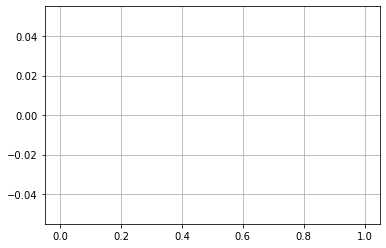

In [9]:
# Create a copy of the source data since aggregations are destructive
dfa = df.copy()
# Convert the date fields to pandas dates
for c in ["BIRTHDATE", "DEATHDATE", "START", "STOP"]:
    dfa[c] = dfa[c].apply(lambda x: pd.to_datetime(x, errors="coerce", dayfirst=True).date())
# Filter for the final medical treatment for all deceased patients
dfa = dfa[dfa.STOP==dfa.DEATHDATE]
dfa.sort_values(by="STOP", inplace=True)
dfa.drop_duplicates(subset="PATIENT", keep="last", inplace=True)
# Create the DEATHAGE 
# This is a VERY approximate age at death calculation
dfa["DEATHAGE"] = dfa.DEATHDATE.apply(lambda x: x.year) - dfa.BIRTHDATE.apply(lambda x: x.year)
# And draw the DEATHAGE distribution, divided into n bins
dfa["DEATHAGE"].hist(bins=10)

# yeah I don't know how to make this work with
# the data I have so I'm just submitting this as is
# please advise if there's corrections on how
# to actually make it work since I'm still at
# the point where coding is kinda fun
# tho I am rapidly losing patience lol